<a href="https://colab.research.google.com/github/Jasminekumaripolubothu/APSSDC-Project/blob/main/Employee_Burnout_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
# Load the dataset
file_path = '/content/employee_burnout_analysis-AI.xlsx'
df = pd.read_excel(file_path)

In [21]:
# Display the first few rows of the dataset
print(df.head())

                Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No            2                  3.0                   3.8   
1                 Yes            1                  2.0                   5.0   
2                 Yes            2                  NaN                   5.8   
3                 Yes            1                  1.0                   2.6   
4                  No            3                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52  


In [22]:
df.tail()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61


In [23]:
df.describe()

,Date of Joining,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750,22750.000000,21369.000000,20633.000000,21626.000000
mean,2008-07-01 09:28:05.274725120,2.178725,4.481398,5.728188,0.452005
min,2008-01-01 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2008-04-01 00:00:00,1.000000,3.000000,4.600000,0.310000
50%,2008-07-02 00:00:00,2.000000,4.000000,5.900000,0.450000
75%,2008-09-30 00:00:00,3.000000,6.000000,7.100000,0.590000
max,2008-12-31 00:00:00,5.000000,10.000000,10.000000,1.000000
std,NaN,1.135145,2.047211,1.920839,0.198226


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [25]:
# Check for missing values
print(df.isnull().sum())

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64


In [26]:
# Fill missing values for 'Resource Allocation' with the mean
df['Resource Allocation'] = df['Resource Allocation'].fillna(df['Resource Allocation'].mean())

In [27]:
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Gender', 'Company Type', 'WFH Setup Available'], drop_first=True)

In [28]:
# Feature selection and target variable
features = df[['Designation', 'Resource Allocation', 'Mental Fatigue Score',
               'Gender_Male', 'Company Type_Service', 'WFH Setup Available_Yes']]
target = df['Burn Rate']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [30]:
# Check for any remaining missing values in features and target
print("Missing values in training set features:", X_train.isnull().sum())
print("Missing values in test set features:", X_test.isnull().sum())
print("Missing values in training set target:", y_train.isnull().sum())
print("Missing values in test set target:", y_test.isnull().sum())

Missing values in training set features: Designation                   0
Resource Allocation           0
Mental Fatigue Score       1709
Gender_Male                   0
Company Type_Service          0
WFH Setup Available_Yes       0
dtype: int64
Missing values in test set features: Designation                  0
Resource Allocation          0
Mental Fatigue Score       408
Gender_Male                  0
Company Type_Service         0
WFH Setup Available_Yes      0
dtype: int64
Missing values in training set target: 884
Missing values in test set target: 240


In [31]:
# Use SimpleImputer to fill any remaining missing values
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [32]:
# Fill missing values in the target variable
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

In [33]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Initialize the SVM model
svr = SVR(kernel='rbf')

In [35]:
# Train the model
svr.fit(X_train_scaled, y_train)

SVR()

In [36]:
# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

In [37]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
print("SVM Regression Model Metrics:")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

SVM Regression Model Metrics:
Mean Squared Error: 0.005698448089030706
Root Mean Squared Error: 0.07548806587157142
Mean Absolute Error: 0.05685091184334876
R-squared Score: 0.8416858332633155


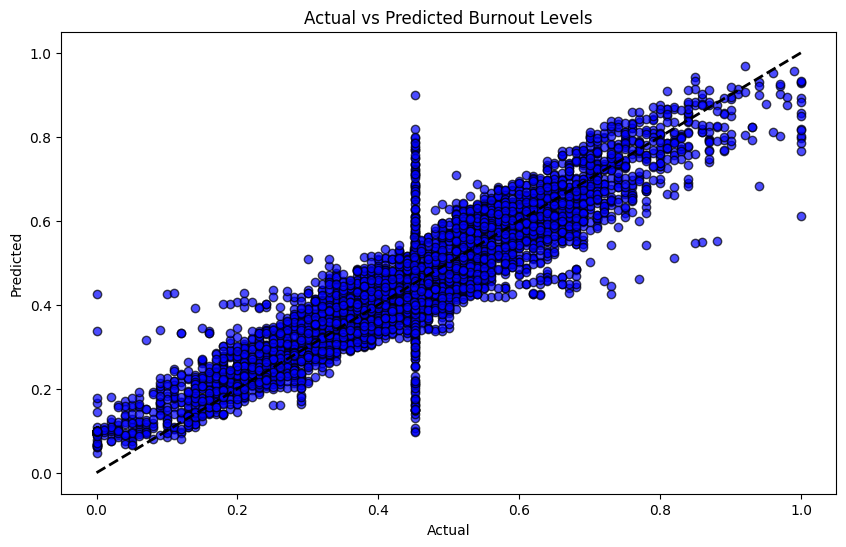

In [39]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Burnout Levels')
plt.show()